In [104]:
import numpy as np
import pandas as pd
import matplotlib.pylab as subplot
import matplotlib.pyplot as plt

In [10]:
title_basics = pd.read_csv('data/title.basics.tsv', delimiter='\t', encoding='utf-8')

/Users/huangzhisheng/miniconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [63]:
title_basics_movie = title_basics[title_basics['titleType'] == 'movie']
#print title_basics_movie.head(10)
#print "Number of movies", title_basics_movie.shape[0]

In [64]:
title_basics_movie_genres = title_basics_movie[title_basics_movie.genres != '\N']
uid = title_basics_movie_genres['tconst']
#print title_basics_movie_genres.head(10)
#print uid[0:19]
print "Number of movies with genre values:", title_basics_movie_genres.shape[0]


Number of movies with genre values: 402777


In [66]:
# copy from types_and_ratins.ipynb
def split_rows(data,column_name):
    '''
    input:
    data:an object of pandas.DataFrame whose rows need to be divided. type: pandas.DataFrame
    name_of_the_column: name of the column which we divide the rows by. type:string
    
    output:an object of pandas.DataFrame whose rows has been divided
    output type:pandas.DataFrame
    '''
    assert isinstance(column_name,str)
    
    tem=data[column_name].str.split(',',expand=True).stack().reset_index() #split the column and reindex
    tem.columns=['level_0','level_1','new_'+column_name]#name the new column
    res=pd.merge(tem,data,how='inner',left_on='level_0',right_index=True)#combine the column we just got with the raw dataset
    
    res=res.drop('level_0',1)#remove useless column
    res=res.drop('level_1',1)#remove useless column
    res=res.drop(column_name,1)#remove useless column
    
    return res

In [76]:
# genres contains all the genres in the dataset

movie_genres = split_rows(title_basics_movie_genres[['genres']], 'genres')
print movie_genres.head(10)


    new_genres
0      Romance
1  Documentary
2         News
3        Sport
4    Biography
5        Drama
6    Biography
7        Crime
8        Drama
9        Drama


In [109]:
movies_per_genre = movie_genres.groupby(['new_genres'])['new_genres'].count()
movies_per_genre.name = 'Movies per genre'
print movies_per_genre

new_genres
Action          38519
Adult            7524
Adventure       20974
Animation        5932
Biography       13321
Comedy          82746
Crime           26712
Documentary     86649
Drama          161680
Family          13674
Fantasy         10298
Film-Noir         850
Game-Show          13
History         10717
Horror          23582
Music            8504
Musical          8524
Mystery         11638
News             1765
Reality-TV        131
Romance         34964
Sci-Fi           9497
Short               3
Sport            4412
Talk-Show          53
Thriller        29682
War              7547
Western          7061
Name: Movies per genre, dtype: int64


28

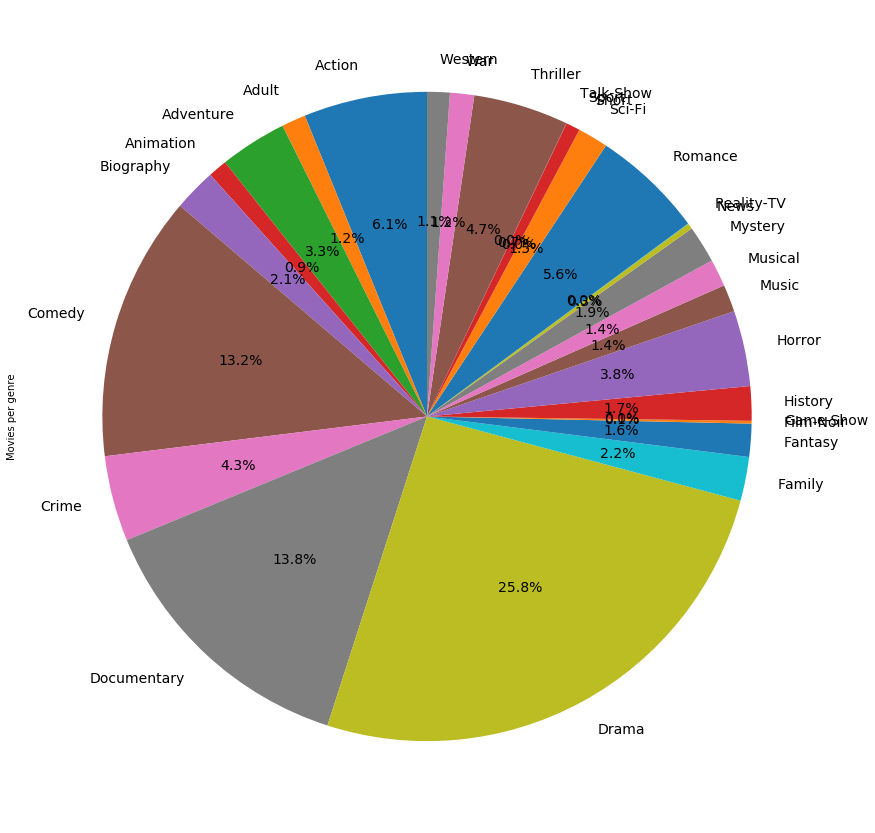

In [125]:
#movies_above_average = pd.DataFrame({'genres':movies_above_average.index, 'number':movies_above_average.values})
plt.figure(figsize=(32,16))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
movies_per_genre.plot(kind='pie', y = 'Movies per genre', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=14)


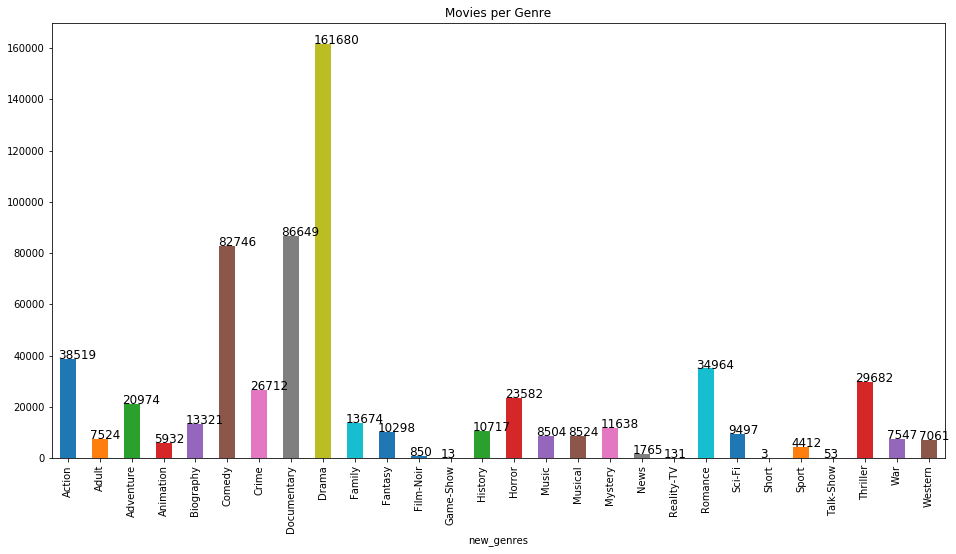

In [133]:
plt.figure(figsize=(16,8))
label = []
for i in movies_per_genre:
    label.append(i)
for i in range(len(movies_per_genre)):
    plt.text(x = i-.3, y = movies_per_genre[i]+0.3, s = label[i], size = 12)   
movies_per_genre.plot(kind = 'bar', title='Movies per Genre')